## Tree Survival Prediction

In [ ]:
# اوامر تثبيت المكتبات الضرورية 
conda install -c conda-forge matplotlib  
conda install -c conda-forge seaborn 
conda install -c conda-forge scikit-learn 
conda install -y -c conda-forge xgboost
conda install -c bioconda perl-warnings-register

In [105]:
# نقوم باستدعاء المكتبات الضرورية 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor , XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [106]:
# نقرا ملف البيانات ونحفظة في متغير 
df = pd.read_csv("Tree_Data.csv")
df

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,7165,17,B,Prunus serotina,0.111,Med,2017,Populus grandidentata,891,Non-Sterile,...,40.89,NaN,0.83,9.15,11.88,16,56.0,1.0,NaN,NaN
2779,7217,17,D,Quercus alba,0.118,Med,2017,Acer rubrum,1468,Non-Sterile,...,15.47,32.82,4.88,19.01,23.50,16,56.0,1.0,NaN,NaN
2780,7306,17,D,Quercus alba,0.118,Med,2017,Quercus rubra,1454,Non-Sterile,...,11.96,37.67,5.51,21.13,19.10,16,56.0,1.0,NaN,NaN
2781,7771,18,D,Quercus alba,0.161,High,2017,Sterile,1297,Sterile,...,16.99,22.51,4.28,19.38,21.36,33,115.5,NaN,NaN,NaN


In [107]:
# بعض المعلومات عن البيانات مثل المتوسط والمجموع والعدد الاكبر والاقل  واكثر 
df.describe()

,No,Plot,Light_ISF,Core,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,1283.00000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2782.000000
mean,3914.513834,9.561624,0.085707,2016.648940,20.553069,26.47675,1.933105,15.759792,14.219641,15.282070,53.487244,0.570453
std,2253.515063,5.203659,0.025638,0.477387,12.309587,16.63689,1.969842,6.779607,4.298271,9.166555,32.082942,0.495100
min,3.000000,1.000000,0.032000,2016.000000,0.000000,0.00000,-1.350000,2.230000,4.300000,4.000000,14.000000,0.000000
25%,1971.000000,5.000000,0.066000,2016.000000,13.400000,13.78000,0.170000,10.355000,11.605000,7.000000,24.500000,0.000000
50%,3932.000000,10.000000,0.082000,2017.000000,18.000000,27.72000,0.750000,14.040000,12.660000,13.000000,45.500000,1.000000
75%,5879.000000,14.000000,0.100000,2017.000000,24.445000,35.71000,3.780000,21.115000,17.275000,18.000000,63.000000,1.000000
max,7772.000000,18.000000,0.161000,2017.000000,100.000000,87.50000,6.100000,32.770000,29.450000,33.000000,115.500000,1.000000


In [108]:
#نعرض معلومات مفصلة عن مجموعة البيانات 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census

In [109]:
#نقوم باكتشاف القيم الفارغة 
df.isnull().sum()

No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             1
Harvest        2079
Alive          2292
dtype: int64

In [110]:
# نحدد عدد المتغيرات احدي الاعمدة 
df.Conspecific.value_counts()

Heterospecific    1974
Sterilized         423
Conspecific        386
Name: Conspecific, dtype: int64

In [111]:
# نحذف الاعمدة الغير ضرورية لتسهيل عملية التعلم الالي 
df.drop(['Soil', 'Core','Adult','Alive','Myco','SoilMyco','PlantDate','Phenolics','Light_ISF','Time','Lignin','Harvest'], axis = 1, inplace = True)

In [112]:
df 

,No,Plot,Subplot,Species,Light_Cat,Sterile,Conspecific,AMF,EMF,NSC,Census,Event
0,126,1,C,Acer saccharum,Med,Non-Sterile,Heterospecific,22.00,NaN,12.15,4,1.0
1,11,1,C,Quercus alba,Med,Non-Sterile,Heterospecific,15.82,31.07,19.29,33,0.0
2,12,1,C,Quercus rubra,Med,Non-Sterile,Heterospecific,24.45,28.19,15.01,18,1.0
3,2823,7,D,Acer saccharum,Med,Non-Sterile,Heterospecific,22.23,NaN,12.36,4,1.0
4,5679,14,A,Acer saccharum,Low,Non-Sterile,Heterospecific,21.15,NaN,11.20,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2778,7165,17,B,Prunus serotina,Med,Non-Sterile,Heterospecific,40.89,NaN,11.88,16,1.0
2779,7217,17,D,Quercus alba,Med,Non-Sterile,Heterospecific,15.47,32.82,23.50,16,1.0
2780,7306,17,D,Quercus alba,Med,Non-Sterile,Heterospecific,11.96,37.67,19.10,16,1.0
2781,7771,18,D,Quercus alba,High,Sterile,Sterilized,16.99,22.51,21.36,33,NaN


In [113]:
#   نعيد تسمية بعض الاعمدة لتسهيل التعامل معها 
df.rename(columns={'No': 'Seedling',
                   'Plot': 'The_number_of_times_the_seedling_was_planted','NSC':'percent_nonstructural_carbohydrates',
                   'Light_Cat':'amount_light'},
          inplace=True, errors='raise')

In [114]:
df 

,Seedling,The_number_of_times_the_seedling_was_planted,Subplot,Species,amount_light,Sterile,Conspecific,AMF,EMF,percent_nonstructural_carbohydrates,Census,Event
0,126,1,C,Acer saccharum,Med,Non-Sterile,Heterospecific,22.00,NaN,12.15,4,1.0
1,11,1,C,Quercus alba,Med,Non-Sterile,Heterospecific,15.82,31.07,19.29,33,0.0
2,12,1,C,Quercus rubra,Med,Non-Sterile,Heterospecific,24.45,28.19,15.01,18,1.0
3,2823,7,D,Acer saccharum,Med,Non-Sterile,Heterospecific,22.23,NaN,12.36,4,1.0
4,5679,14,A,Acer saccharum,Low,Non-Sterile,Heterospecific,21.15,NaN,11.20,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2778,7165,17,B,Prunus serotina,Med,Non-Sterile,Heterospecific,40.89,NaN,11.88,16,1.0
2779,7217,17,D,Quercus alba,Med,Non-Sterile,Heterospecific,15.47,32.82,23.50,16,1.0
2780,7306,17,D,Quercus alba,Med,Non-Sterile,Heterospecific,11.96,37.67,19.10,16,1.0
2781,7771,18,D,Quercus alba,High,Sterile,Sterilized,16.99,22.51,21.36,33,NaN


In [115]:
df.isnull().sum()

Seedling                                           0
The_number_of_times_the_seedling_was_planted       0
Subplot                                            0
Species                                            0
amount_light                                       0
Sterile                                            0
Conspecific                                        0
AMF                                                0
EMF                                             1500
percent_nonstructural_carbohydrates                0
Census                                             0
Event                                              1
dtype: int64

In [117]:
# نقوم بالتعويض عن القيم الفارغة بما يناسب 
df['EMF'] = df['EMF'].fillna(0)
df['Event'] = df['Event'].fillna(0)
df.head()

,Seedling,The_number_of_times_the_seedling_was_planted,Subplot,Species,amount_light,Sterile,Conspecific,AMF,EMF,percent_nonstructural_carbohydrates,Census,Event
0,126,1,C,Acer saccharum,Med,Non-Sterile,Heterospecific,22.00,0.00,12.15,4,1.0
1,11,1,C,Quercus alba,Med,Non-Sterile,Heterospecific,15.82,31.07,19.29,33,0.0
2,12,1,C,Quercus rubra,Med,Non-Sterile,Heterospecific,24.45,28.19,15.01,18,1.0
3,2823,7,D,Acer saccharum,Med,Non-Sterile,Heterospecific,22.23,0.00,12.36,4,1.0
4,5679,14,A,Acer saccharum,Low,Non-Sterile,Heterospecific,21.15,0.00,11.20,4,1.0


In [118]:
# التأكد من عدم وجود قميم فارغة 
df.isnull().sum()

Seedling                                        0
The_number_of_times_the_seedling_was_planted    0
Subplot                                         0
Species                                         0
amount_light                                    0
Sterile                                         0
Conspecific                                     0
AMF                                             0
EMF                                             0
percent_nonstructural_carbohydrates             0
Census                                          0
Event                                           0
dtype: int64

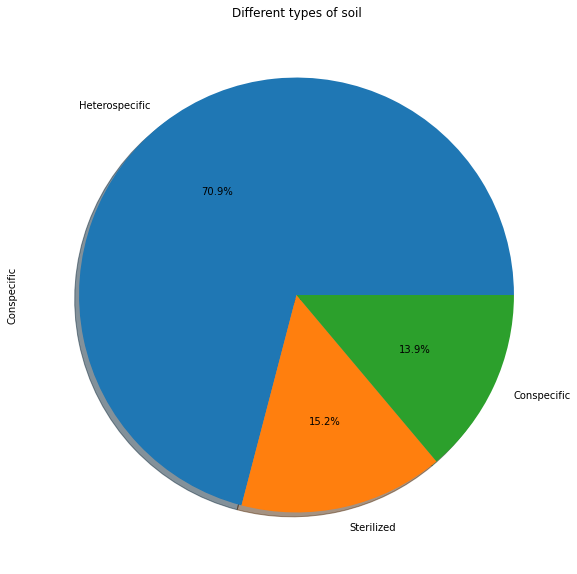

In [119]:
# نحدد نسبة التربة المتجانسة والمعقمة و  التربة الخاصة 
plt.title('Different types of soil')
df['Conspecific'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.show()

In [84]:
gender_freq = df['Sterile'].value_counts()
gender_freq

Non-Sterile    2360
Sterile         423
Name: Sterile, dtype: int64

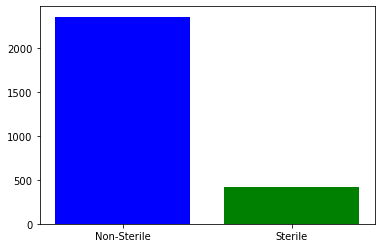

In [85]:
# التربة المعقمة والغير  معقمة 
plt.bar(gender_freq.index ,gender_freq, color = ['blue','green']) 
plt.show()

In [33]:
df.Species.value_counts()

Acer saccharum     751
Prunus serotina    749
Quercus alba       673
Quercus rubra      610
Name: Species, dtype: int64

D:\Anaconda3\envs\BML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


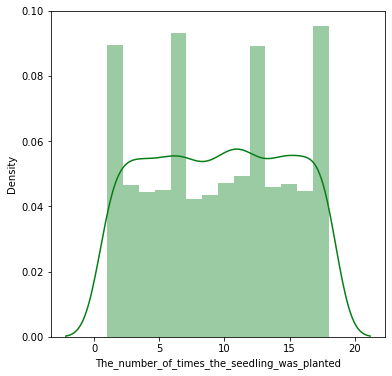

In [58]:
#كم مرة تم نقل الشتلة او اعاد زراعتها 
plt.figure(figsize=(6,6))
sns.distplot(df.The_number_of_times_the_seedling_was_planted, color='#077D17')
plt.show()

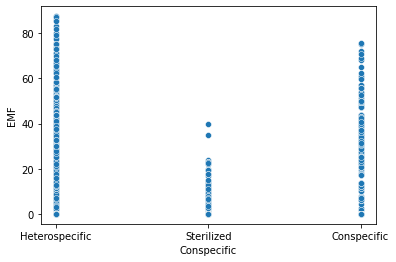

In [74]:
# مقارنة بين نسبة التربة المعقمة والمخطلطة والمخصصة 
sns.scatterplot(data=df, x="Conspecific", y="EMF")
plt.show()

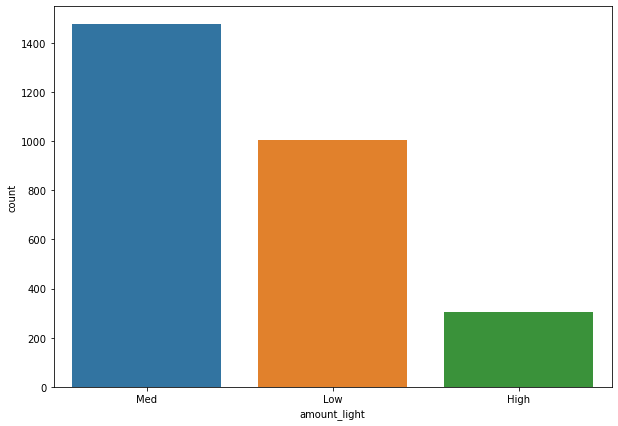

In [79]:
# نسبة الضوء الواصلة لكل شتلة 
plt.figure(figsize=(10,7))
sns.countplot(x=df.amount_light, data=df)
plt.show()

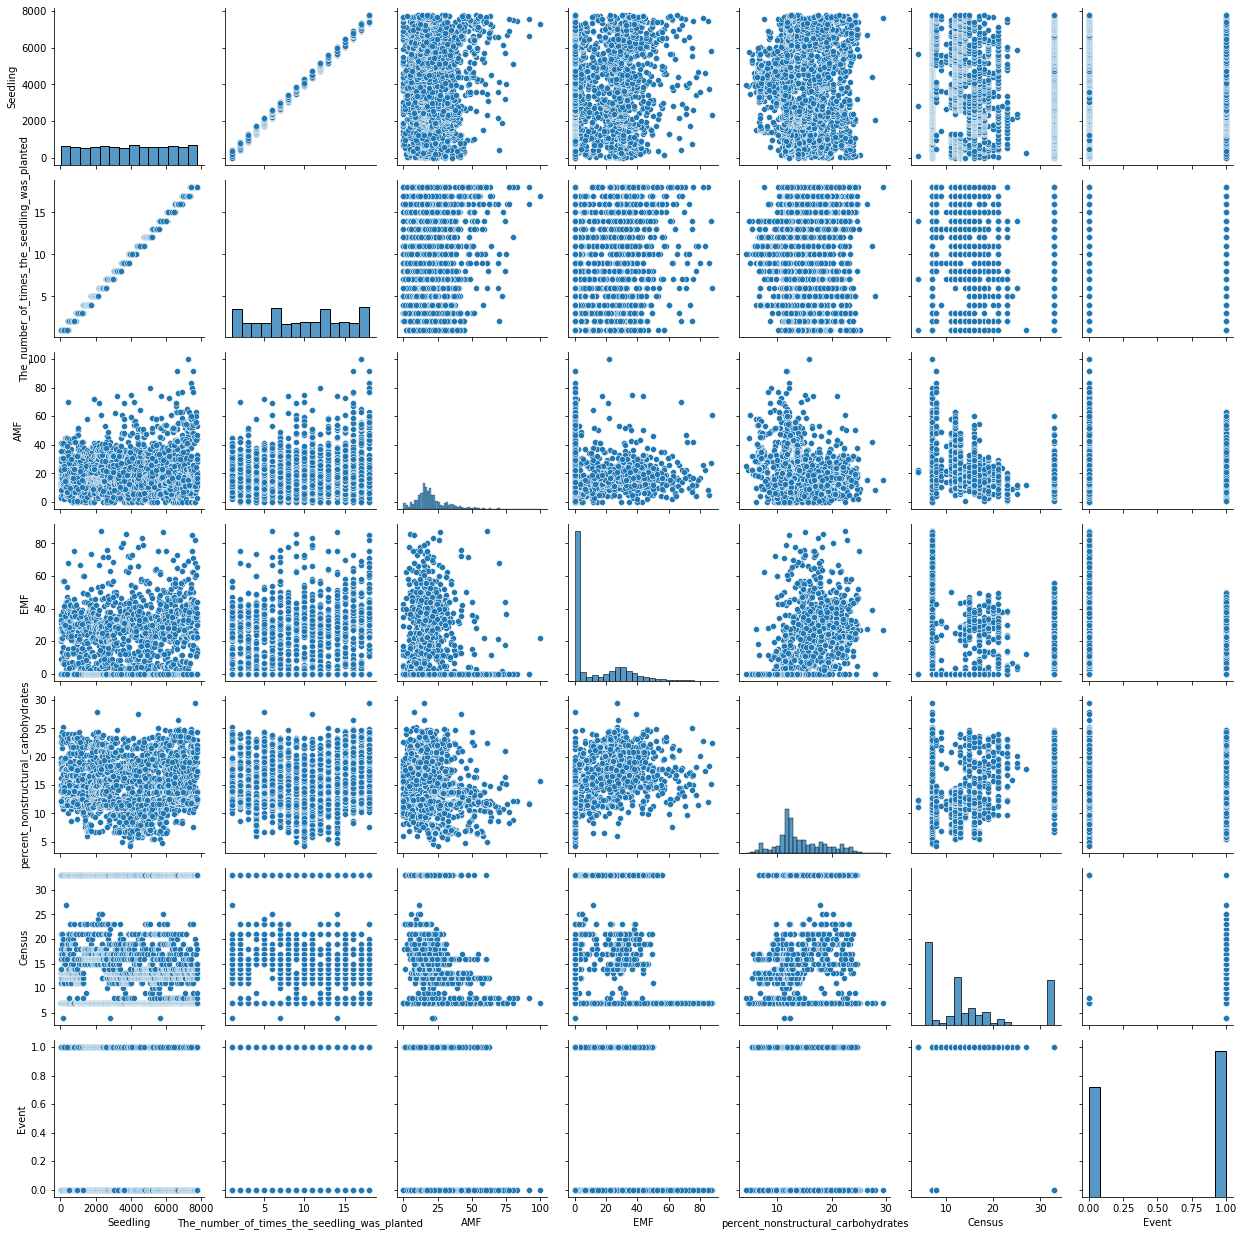

In [75]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [120]:
df

,Seedling,The_number_of_times_the_seedling_was_planted,Subplot,Species,amount_light,Sterile,Conspecific,AMF,EMF,percent_nonstructural_carbohydrates,Census,Event
0,126,1,C,Acer saccharum,Med,Non-Sterile,Heterospecific,22.00,0.00,12.15,4,1.0
1,11,1,C,Quercus alba,Med,Non-Sterile,Heterospecific,15.82,31.07,19.29,33,0.0
2,12,1,C,Quercus rubra,Med,Non-Sterile,Heterospecific,24.45,28.19,15.01,18,1.0
3,2823,7,D,Acer saccharum,Med,Non-Sterile,Heterospecific,22.23,0.00,12.36,4,1.0
4,5679,14,A,Acer saccharum,Low,Non-Sterile,Heterospecific,21.15,0.00,11.20,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2778,7165,17,B,Prunus serotina,Med,Non-Sterile,Heterospecific,40.89,0.00,11.88,16,1.0
2779,7217,17,D,Quercus alba,Med,Non-Sterile,Heterospecific,15.47,32.82,23.50,16,1.0
2780,7306,17,D,Quercus alba,Med,Non-Sterile,Heterospecific,11.96,37.67,19.10,16,1.0
2781,7771,18,D,Quercus alba,High,Sterile,Sterilized,16.99,22.51,21.36,33,0.0


In [121]:
# نستخدم مكتبة ليبل انكودر لي ترميز القيم النصية 
encoder = LabelEncoder()

In [122]:
df.Subplot = encoder.fit_transform(df.Subplot)
df.Species = encoder.fit_transform(df.Species)
df.amount_light = encoder.fit_transform(df.amount_light)
df.Sterile = encoder.fit_transform(df.Sterile)
df.Conspecific = encoder.fit_transform(df.Conspecific)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Seedling                                      2783 non-null   int64  
 1   The_number_of_times_the_seedling_was_planted  2783 non-null   int64  
 2   Subplot                                       2783 non-null   int32  
 3   Species                                       2783 non-null   int32  
 4   amount_light                                  2783 non-null   int32  
 5   Sterile                                       2783 non-null   int32  
 6   Conspecific                                   2783 non-null   int32  
 7   AMF                                           2783 non-null   float64
 8   EMF                                           2783 non-null   float64
 9   percent_nonstructural_carbohydrates           2783 non-null   f

In [124]:
# نقوم بفصل العماود الذي سنختبر البيانات عليه عن باقي البيانات 
X = df.drop('Event',axis='columns')
y = df.Event

In [125]:
# نقسم لاختبار وتدريب 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=30,random_state=20)

In [126]:
#هي دالة تسهل علينا انشاء اكثر من نموذج مدرب 
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=5)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")
def model_train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Train= {model_train_score *100}%\n{model_name} model score on Test= {model_test_score*100}%")
def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%") 

In [127]:
model_DTR = DecisionTreeClassifier()
model_train(model_DTR,'DecisionTreeClassifier')
kfolds(model_DTR,'DecisionTreeClassifier')

DecisionTreeClassifier model score on Train= 100.0%
DecisionTreeClassifier model score on Test= 100.0%
DecisionTreeClassifier score on cross validation: 81.50246050915102%


In [129]:
model_RFR2 = RandomForestClassifier(n_estimators=20)
model_train(model_RFR2,'RandomForestClassifier')
kfolds(model_RFR2,'RandomForestClassifier')

RandomForestClassifier model score on Train= 99.96367598982928%
RandomForestClassifier model score on Test= 96.66666666666667%
RandomForestClassifier score on cross validation: 80.34905648192398%


In [130]:
from xgboost import XGBClassifier
model_XG = XGBClassifier()
model_train(model_XG, "XGBoost")
kfolds(model_XG, "XGBoost")

[19:21:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost model score on Train= 100.0%
XGBoost model score on Test= 100.0%
[19:21:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 

## نجد ان الافضل هنا هو XGBClassifier